In [27]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Artificial Neural Networks

L'introduzione delle reti neurali artificiali e' datata al 1943, anno in cui McCulloch e Pitts presentano il primo modello computazionale ispirato al neurone.<br>
Attualmente hanno guadagnato notevole interesse per diversi motivi contigenti:
- enormi quantita' di dati per l'addestramento
- aumento della capacita' computazionale per supportare il training di grandi ANN. Da sottolineare il contributo dall'industria del gaming con l'introduzione di GPU - graphical processing unit - e lo sviluppo di architetture ad hoc come TPU, FPGA o chip neuromorfici.
- progressi negli algoritmi di apprendimento ed ottimizzazione

Il perceptron e' la piu' semplice architettura ANN ed e' basato su una singola linear threshold unit - LTU.
$$y_{\mathbf{w}}(\mathbf{x}) = \phi(\mathbf{w}^T\mathbf{x})$$
dove $\phi$ puo' essere una funzione di Heaviside oppure una funzione segno:
$$ hs(x) = 
\begin{cases}
    0 & \text{se } x<0\\
    1 & \text{se} x \geq 0
\end{cases}
\hspace{1cm}
sgn(x) = 
\begin{cases}
    -1 & \text{se } x<0\\
    0 & \text{se} x == 0\\
    1 & \text{se} x\geq 0
\end{cases}
$$

In general un perceptron puo' essere composto da una sequenza di LTU - **layer** - dove ogni LTU di un layer e' connessa ad ogni LTU del layer precedente. In questo caso si parla di **fully connected** o **dense layer**. 
![](perceptron_layer.png)

Nella figura vediamo come il bias venga inserito nell'**input layer** come unita' con valore 1.

E' possibile formulare la seguente architettura in termini matriciali, considerando l'intero feature matrix o matrice delle istanze $\mathbf{X}$:
$$y_{\mathbf{W,b}}(\mathbf{X}) = \phi(\mathbf{XW} + \mathbf{b})$$

dove $\phi$ indica una generica **activation function**.

La fase di learning del perceptron utilizza il gradiente discendente, il quale e' ispirato a *Hebbian learning* - la forza della connessione tra due neuroni aumenta quando uno dei due "innesca" o "stimola" il secondo. Nel caos del perceptron vengono rafforzate i pesi delle connessioni che riducono l'errore di predizione.

Sulla base dell'architettura del perceptron si possono creare architetture piu' complesse "impilando" diversi dense layers; definendo quindi un **Multilayer Perceptron - MLP**.
![](mlp.png)

L'elemento caratterizzante questa architettura e' la presenza di 1 o piu' livelli nascosti - **hidden layers**. Ogni hidden layer include anche un'unita di bias.<br>
Quando gli hidden layer sono molti si parla di architettura **deep neural network - DNN**. 

L'utilizzo di un'architettura deep e' resa computazionalmente ammissibile dall'algoritmo di backpropagation (1986) che permette di aggiornare i pesi di tutti i livelli mediante due scansioni della rete: una forward e una backward secondo un approccio di tipo Gradient Descent.

Rispetto alla LTU del perceptron viene introdotta un'ulteriore modifica per evitare che il gradiente venga posto a 0 - heaviside e sgn hanno gradiente 0. Le alternative per definire la funzione di attivazione $\phi$ sono molteplici, tuttavia in pratica vengono utilizzate prevalentemente 3 funzioni:
- sigmoid: $\phi(x) = 1 / (1 + exp(-x))$
- hyperbolic tangent: $\phi(x) = tanh(x)$
- ReLU - Rectified Linear Unit: $\phi(x) = max(0,x)$. Non e' differenziabile in 0 ma e' diventata lo standard de facto per performance e facilita' di computazione.

Le activation funciont sono fondamentali nelle architetture DNN perche' introducono la non-linearita'; senza activation function non lineari la composizione dei layer restituirebbe una funzione lineare in quanto ogni layer e' una funzione lineare $\mathbf{w}^T\mathbf{x}$.

### MLP for Regression
Per applicare MLP ad un problema di regressione necessitiamo di una singola unita' di output che restituisce un valore reale, il valore predetto. E' possibile aggiungere altre unita' di output di tipo reale in caso di regressione multivariata - predico piu' valori associati ad una nuova istanza. <br>
Nel caso di regressione l'activation function non e' necessaria tuttavia, posso utilizzare alcune funzioni se voglio garantire alcune condizioni sull'output:
- output positivo: ReLU, softplus $\phi(x)=log(1+exp(x))$
- insieme limitato: logistic o $tanh$
Come loss function si possono utilizzare MSE - mean squared error, MAE - mean absolute error oppure Huber loss.

### MLP for Classification
Per un problema di classificazione binaria e' necessaria una sola unita' di output tra 0 e 1 - probabilita' della classe positiva. Per gestire un problema di multiclass classification viene inserita un'unita' di output per ogni classe a cui applicare una funzione di attivazione softmax. Se $\mathbf{s}(\mathbf{x})$ e' il vettore che in posizione $k$ contiene lo score assegnato alla classe $k$, cioe' output della $k$-esima unita' di output, la softmax function di $\mathbf{s}_k(\mathbf{x})$ e' data da:
$$\sigma(\mathbf{s}(\mathbf{x})_k))=\frac{exp(\mathbf{s}_k(\mathbf{x}))}{\sum_{j=1}^K exp(\mathbf{s}_j(\mathbf{x}))}$$
e la classe predetta corrisonde al valore di $k$ con softmax function piu' elevata.<br>
Come loss function si utilizza la cross-entropy loss

## Implementing MLPs with Keras
Keras (https://keras.io/) e' un API di alto livello per il deep learning che permette di definire, addestrare e valutare qualsiasi architettura di tipo ANN.

Keras si basa su un backend per la computazione che puo' essere TensorFlow, CNTK o Theano. Tuttavia, TensorFlow viene rilasciato con un'implementazione di Keras a cui si aggiungono delle funzionalita' extra.

In questo notebook utilizzeremo l'implementazione delle API di Keras rilasciata in TensorFlow.

In [1]:
from tensorflow import keras

Come esempio applicativo utilizziamo un dataset simile al MNIST, ma relativo ad immagini di capi di abbigliamento a cui e' stata assegnata una label indicante il tipo di capo. Affrontiamo quindi un problema di classificazione multiclasse.

In [36]:
(X_train_full, y_train_full),(X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Su questo dataset, estraiamo un validation set dal training set e rilascaliamo le immagini.

In [37]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [38]:
X_train.shape, X_valid.shape

((55000, 28, 28), (5000, 28, 28))

In [39]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

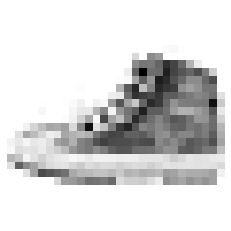

'Sneaker'

In [13]:
plt.imshow(X_train[2], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_train[2]]

### Creazione del modello MLP

In [46]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Abbiamo creato un modello di tipo **Sequential** - uno dei piu' semplici - in cui i livelli sono messi in sequenza. Stiamo quindi impilando gli hidden layer secondo l'architettura MLP. Il primo livello - quello di input - e' modellato da un oggetto **Flatten** che converte l'input originario (matrice 28x28) in un vettore, linearizzando o flattenizzando la matrice dell'immagine. Attraverso il parametro **input_shape** specifico la dimensionalita' dell'input, cioe' il numero di feature di ogni istanza.

Viene aggiunto un hidden layer di tipo fully connected mediante la creazione di un oggetto **Dense**. Devo specificare quante unita' compongono il livello e quale funzione di attivazione utilizzare.

Dopo aver aggiunto un ulteriore hidden layer contenente 100 unita' e funzione di attivazione ReLU, viene aggiunto il livello di output. Dal momento che il numero di classi e' 10 e siamo in un contesto di multiclass classification posso utilizzare softmax come funzione di attivazione, in modo da ottenere un singolo input.

NB: Ogni livello gestisce la sua matrice dei pesi $\mathbf{W}$ e il vettore dei bias $\mathbf{b}$. Tali elementi possono essere ottenuti mediante il metodo **get_weights**

In [16]:
W_h1, b_h1 = model.layers[1].get_weights()

In [21]:
W_h1, W_h1.shape, b_h1, b_h1.shape

(array([[-0.02966851,  0.06497736, -0.03102705, ...,  0.02661753,
         -0.03735466,  0.05685103],
        [-0.00971091, -0.02967479,  0.01740143, ...,  0.01935496,
         -0.00887664,  0.067968  ],
        [ 0.02080519, -0.0449068 ,  0.06666592, ...,  0.05642565,
         -0.04088403, -0.05875728],
        ...,
        [-0.00314967, -0.03852612, -0.05186538, ..., -0.07165267,
         -0.05047796, -0.03949234],
        [-0.06030037,  0.03175658,  0.00421286, ..., -0.03754115,
         -0.06017287, -0.00452667],
        [-0.07061649, -0.00258705, -0.03754215, ...,  0.06227942,
         -0.04031346, -0.00485733]], dtype=float32),
 (784, 300),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0

La matrice dei pesi di ogni layer viene inizializzata in modo casuale, mentre il vettore dei bias viene inizializzato con 0. E' possibile modificare questo comportamento tramite gli argomenti **set_kernel_initializer** e **bias_initializer**.


Il metodo **summary** visualizza tutti i livelli del modello e fornisce alcune informazioni sulla dimensione dei livelli e il numero di parametri del modello. Mentre l'attributo **layers** permettere di accedere ad un singolo livello.

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Il modello ha 266,610 parametri, e' flessibile ma incline all'overfitting. Abbiamo bisogno di avere molti dati di training.

### Compilazione del modello
Dopo la creazione di un modello devo specificare la funzione di loss e l'algoritmo di ottimizzazione, ed eventualmente le metriche di performance da utilizzare. Il metodo **compile** viene invocato per questi scopi

In [47]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics =  ['accuracy']
             )

### Training
Il training del modello avviene invocando il metodo **fit**. Richiede il training set e il relativo label vector, il numero di epoche (quante volte devo scansionare tutto il training set). Posso passare anche un validation set in modo da verificare come il modello si comporta su dati "nuovi" attraverso l'argomento **validation_data**.

Per definire un validation set posso utilizzare il parametro **validation_split** che indica la percentuale di istanze da inserire nel validation set. 

Nel caso la distribuzione delle classi non sia bilanciata possiamo applicare un vettore di pesi alle classi in modo da dare piu' peso alle classi sottorappresentate.

In [50]:
print(X_train.shape, X_valid.shape)
history = model.fit(X_train, y_train,
          epochs=30,
          validation_data=(X_valid,y_valid),
          verbose = 2
         )

(55000, 28, 28) (5000, 28, 28)
Epoch 1/30
1719/1719 - 2s - loss: 0.2601 - accuracy: 0.9051 - val_loss: 0.2949 - val_accuracy: 0.8944
Epoch 2/30
1719/1719 - 2s - loss: 0.2556 - accuracy: 0.9073 - val_loss: 0.3173 - val_accuracy: 0.8860
Epoch 3/30
1719/1719 - 2s - loss: 0.2513 - accuracy: 0.9087 - val_loss: 0.3179 - val_accuracy: 0.8812
Epoch 4/30
1719/1719 - 2s - loss: 0.2469 - accuracy: 0.9114 - val_loss: 0.3181 - val_accuracy: 0.8814
Epoch 5/30
1719/1719 - 2s - loss: 0.2427 - accuracy: 0.9125 - val_loss: 0.2954 - val_accuracy: 0.8932
Epoch 6/30
1719/1719 - 2s - loss: 0.2381 - accuracy: 0.9140 - val_loss: 0.2991 - val_accuracy: 0.8940
Epoch 7/30
1719/1719 - 2s - loss: 0.2346 - accuracy: 0.9149 - val_loss: 0.2947 - val_accuracy: 0.8924
Epoch 8/30
1719/1719 - 2s - loss: 0.2308 - accuracy: 0.9165 - val_loss: 0.2978 - val_accuracy: 0.8942
Epoch 9/30
1719/1719 - 2s - loss: 0.2270 - accuracy: 0.9193 - val_loss: 0.3029 - val_accuracy: 0.8888
Epoch 10/30
1719/1719 - 2s - loss: 0.2236 - accurac

L'oggetto **History** restituito dal metodo fit contiene i parametri di training (**.params**), la lista delle epoche (**.epoch**) e un dict con i valori della loss function e delle metriche di performance sul training e validation set per ogni epoca.

In [51]:
history.params, history.epoch

({'verbose': 2, 'epochs': 30, 'steps': 1719},
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29])

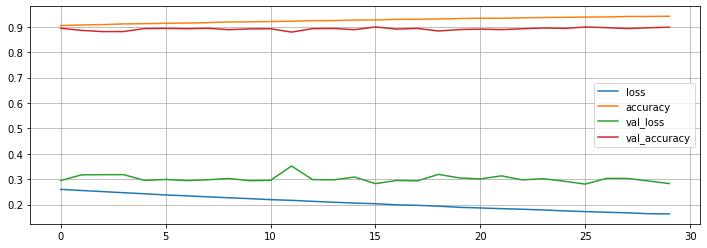

In [52]:
pd.DataFrame(history.history).plot(figsize=(12,4))
plt.grid(True)

Osserviamo un po' di overfitting.

Nel caso venga invocato nuovamente il metodo fit, senza ricreare il modello, il processo di training riprende dall'ultimo stato dei parametri.

Per valutare il modello appresso sul test set utilizziamo il metodo **evaluate**.

In [55]:
model.evaluate(X_test, y_test)[0]/313

313/313 [==============================] - 0s 1ms/step - loss: 70.0301 - accuracy: 0.8520


0.2237383077700679